# **Natural Language Processing with Python**
by [CSpanias](https://cspanias.github.io/aboutme/) - 01/2022

Content based on the [NLTK book](https://www.nltk.org/book/). <br>

You can find Chapter 3 [here](https://www.nltk.org/book/ch03.html).

# CONTENT

1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
3. Processing Raw Text
    1. Accessing Text from the Web and from Disk
    2. Strings: Text Processing at the Lowest Level
    3. Text Processing with Unicode
    4. [Regular Expressions for Detecting Word Patterns](#Regex)
        1. [Using Basic Meta-Characters](#BasicMeta)
        1. [Ranges and Closures](#RangesClosures)
    5. [Useful Applications of Regural Expressions](#RegexApps)
        1. [Extracting Word Pieces](#ExtractPieces)
        1. [Doing More with Word Pieces](#MoreWithPieces)
        1. [Finding Word Stems](#Stems)
        1. [Searching Tokenized Text](#Tokenized)

**Install**, **import** and **download NLTK**. <br>

*Uncomment lines 2 and 5 if you haven't installed and downloaded NLTK yet.*

In [1]:
# install nltk
#!pip install nltk

# load nltk
import nltk

# download nltk
#nltk.download()

<a name="Regex"></a>
## 3.4 Regular Expressions for Detecting Word Patterns
1. [Using Basic Meta-Characters](#BasicMeta)
1. [Ranges and Closures](#RangesClosures)

**`import re`**

In [2]:
import re
from nltk.corpus import words

# create a corpus to search words in and remove proper names
wordlist = [w for w in words.words('en') if w.islower()]

# print the first 10 tokens
print("The first 10 tokens of the wordlist are:\n{}".format(wordlist[:10]))

The first 10 tokens of the wordlist are:
['a', 'aa', 'aal', 'aalii', 'aam', 'aardvark', 'aardwolf', 'aba', 'abac', 'abaca']


<a name="BasicMeta"></a>
###  3.4.1 Using Basic Meta-Characters
**`re.search(pattern, string)`**

**`$`** dollar &rarr; words that ends with <br>
**`^`** carret &rarr; words starts with <br>
**`.`** wildcard &rarr; matches any single character <br>
**`?`** questionmark &rarr; optional previous character

In [3]:
# search for words ending ($) in 'ed'
print("The words that end in 'ed' are:\n{}\n".
      format([w for w in wordlist if re.search('ed$', w)][:10]))

# search for an 8-letter word with 'j' as a 3rd and 't' as its 6th letter
print("The possible word combinations are:\n{}\n".
     format([w for w in wordlist if re.search('^..j..t..$', w)]))

# search for the same 8-letter word without carret and dollar signs
print("The possible word combinations matching the regex without the carret and dollar signs are:\n{}\n".
     format(len([w for w in wordlist if re.search('..j..t..', w)])))

# search for the word email in various forms
mail_list = ['e-mail', 'mail', 'email']
print([w for w in mail_list if re.search('^e?-?mail$', w)])

The words that end in 'ed' are:
['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']

The possible word combinations are:
['abjectly', 'adjuster', 'dejected', 'dejectly', 'injector', 'majestic', 'objectee', 'objector', 'rejecter', 'rejector', 'unjilted', 'unjolted', 'unjustly']

The possible word combinations matching the regex without the carret and dollar signs are:
260

['e-mail', 'mail', 'email']


<a name="RangesClosures"></a>
###  3.4.2 Ranges and Closures
**`[start-end]`** range \ set <br>
**`+`** Kleene Closure \#1 &rarr; one or more instances of the preceding item <br>
**`*`** Kleene Closure \#2 &rarr; zero or more instances of the preceding item <br>
**`[^a]`** Carret inside set &rarr; anything but 'a' <br>
**`a{3-5}`** Braces &rarr; previous character repeated 3 to 5 times <br>
**`a|b`** Pipe &rarr; 'a' or 'b'

The **T9 system** is used for entering text on mobile phones. 

Two or more words that are entered with the same sequence of keystrokes are known as **textonyms**. 

For example, both **hole** and **golf** are entered by pressing the sequence **4653**.

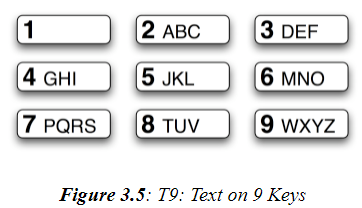

In [4]:
# search for words generated with 4653
print("The words that can be generated with the sequence 4653 are:\n{}\n".
     format([w for w in wordlist if re.search('^[ghi][mno][jkl][def]$', w)]))

The words that can be generated with the sequence 4653 are:
['gold', 'golf', 'hold', 'hole']



The **`^`** operator has another function when it appears as the **first character inside square brackets**. 

For example `'[^aeiouAEIOU]'` matches any character other than a vowel.

In [5]:
# search for 'finger-twisters'
print("The words that can be generated with the numbers 456 are:\n{}\n".
     format([w for w in wordlist if re.search('^[ghimnojkl]+$', w)][:10]))

# same as above more consice
print("The words that can be generated with the numbers 456 are:\n{}\n".
     format([w for w in wordlist if re.search('^[g-o]+$', w)][:10]))

from nltk.corpus import nps_chat

# search for non-vowel characters
print("The non-vowel characters in nps_chat corpus are:\n{}\n".
     format([w for w in nps_chat.words() if re.search('^[^aeiouAEIOU]+$', w)][:10]))

The words that can be generated with the numbers 456 are:
['g', 'ghoom', 'gig', 'giggling', 'gigolo', 'gilim', 'gill', 'gilling', 'gilo', 'gim']

The words that can be generated with the numbers 456 are:
['g', 'ghoom', 'gig', 'giggling', 'gigolo', 'gilim', 'gill', 'gilling', 'gilo', 'gim']

The non-vowel characters in nps_chat corpus are:
[':P', ':', '.', '.', '.', ':)', '26', '/', 'm', '/']



In [6]:
from nltk.corpus import treebank

# get the sorted vocabulary of the treekbank corpus
wsj = sorted(set(treebank.words()))

# starts with one or more number(s)
# escape wildcard functionality, thus, search for a dot
# ends with one or more numbers
print("Pattern: '^[0-9]+\.[0-9]+$':\n{}\n".
      format([w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)][:10]))

# starts with a capital alphabetic letter
# escapes dollar functionality, thus, search for a dollar sign
# ends with a dollar sign
print("Pattern: '^[A-Z]+\$$':\n{}\n".
      format([w for w in wsj if re.search('^[A-Z]+\$$', w)][:10]))

# starts with a numerical character that is repeated 4 times
print("Pattern:\n{}\n".
      format([w for w in wsj if re.search('^[0-9]{4}$', w)][:10]))

# starts with one or more number(s)
# followed by a hyphen
# ends with a lower-case letter that is repeating from 3 to 5 times
print("Pattern:\n{}\n".
      format([w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)][:10]))

# starts with at least 5 lower case letters
# followed by a hyphen
# ends with a maximum of 6 lower case letters
print("Pattern:\n{}\n".
      format([w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]))

# ends with either 'ed' or 'ing'
print("Pattern: '(ed|ing)$'\n{}\n".
      format([w for w in wsj if re.search('(ed|ing)$', w)][:30]))

# either contains 'ed' or ends with 'ing'
print("Pattern: 'ed|ing$'\n{}\n".
      format([w for w in wsj if re.search('ed|ing$', w)][:30]))

Pattern: '^[0-9]+\.[0-9]+$':
['0.0085', '0.05', '0.1', '0.16', '0.2', '0.25', '0.28', '0.3', '0.4', '0.5']

Pattern: '^[A-Z]+\$$':
['C$', 'US$']

Pattern:
['1614', '1637', '1787', '1901', '1903', '1917', '1925', '1929', '1933', '1934']

Pattern:
['10-day', '10-lap', '10-year', '100-share', '12-point', '12-year', '14-hour', '15-day', '150-point', '190-point']

Pattern:
['black-and-white', 'bread-and-butter', 'father-in-law', 'machine-gun-toting', 'savings-and-loan']

Pattern: '(ed|ing)$'
['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything', 'Arbitrage-related', 'Arbitraging', 'Asked', 'Assuming', 'Atlanta-based', 'Baking', 'Banking', 'Beginning', 'Beijing', 'Being', 'Bermuda-based', 'Betting', 'Boeing', 'Broadcasting', 'Bucking', 'Buying', 'Calif.-based', 'Change-ringing', 'Citing', 'Concerned']

Pattern: 'ed|ing$'
['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualize

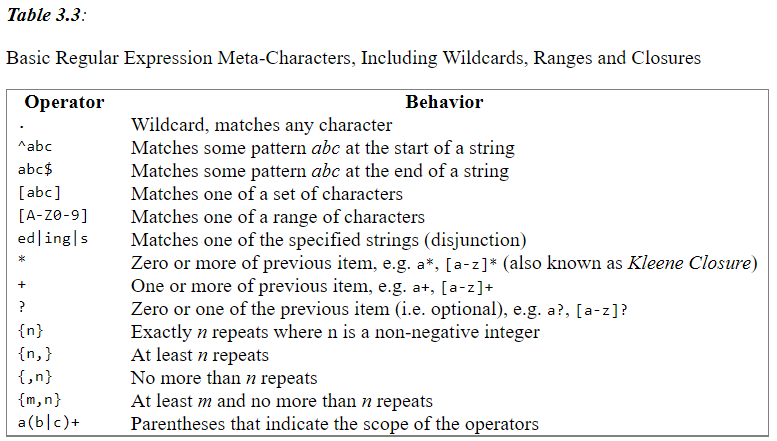

To the **Python interpreter**, a regular expression is just like any other string. 

If the string contains a **backslash** followed by particular characters, it will interpret these specially. For example `\b` would be interpreted as the **backspace character**. 

In general, when using **regular expressions containing backslash**, we should instruct the interpreter **not to look inside the string at all**, **but** simply to **pass it directly to the re library** for processing. 

We do this by prefixing the string with the letter **`r`**, to indicate that it is a **raw string**. 

For example, the raw string `r'\band\b'` contains two `\b` symbols that are **interpreted by the re library** as matching word boundaries **instead of backspace characters**. 

If you get into the **habit of using `r'...'` for regular expressions** you will avoid having to think about these complications.

<a name="RegexApps"></a>
## 3.5 Useful Applications of Regural Expressions
1. [Extracting Word Pieces](#ExtractPieces)
1. [Doing More with Word Pieces](#MoreWithPieces)
1. [Finding Word Stems](#Stems)
1. [Searching Tokenized Text](#Tokenized)

<a name="ExtractPieces"></a>
###  3.5.1 Extracting Word Pieces
**`re.findall`**

Finds all non-overlapping matches of the given regex.

In [1]:
# create a string
word = 'superioucalifiouragiliousticexpialidociouseedeepeekious'

# find vowels
word_vowels = re.findall(r'[aeiou]', word)
print("The vowles of the string are:\n{}\n".format(word_vowels))
print("The number of the word's vowels is: {}\n".format(len(word_vowels)))

# find sequence of 2 or more vowels
vowel_seq = re.findall(r'[aeiou]{2,}', word)
print("Sequences of 2 or more vowels:\n{}\n".format(vowel_seq))
# word length
word_length = len(word)
# find relative frequency
print("The relative frequency of the sequences of 2 or more vowels is:\n{:.2f}%\n".
     format((len(vowel_seq) / word_length)*100))

# create a FreqDist
fdist = nltk.FreqDist(vowel_sequence for vowel_sequence in re.findall(r'[aeiou]{2,}', word))

# find most common + count
print("The relative frequency is:\n{}\n".
     format(fdist.most_common()))

# generate plot
fdist.plot();

NameError: name 're' is not defined

In the **W3C Date Time Format**, dates are represented like this: `2009-12-31`. 

Replace the `?` in the following Python code with a regular expression, in order to **convert the string** `'2009-12-31'` to **a list of integers** `[2009, 12, 31]`:

`[int(n) for n in re.findall(?, '2009-12-31')]`

In [8]:
# W3C date time format (string)
W3C_date = '2009-12-31'

# print value and data type
print("W3C_date's value is {} and is of type {}.\n".format(W3C_date, type(W3C_date)))

# modify date format (str to int)
# find sequence(s) of a minimum 2 and up to 4 numerical characters and convert them to integers
W3C_date_int = [int(n) for n in re.findall(r'[0-9]{2,4}', W3C_date)]

# print results
print("W3C_date_int's value is {}, is of type {}, and its elements are of type {}.\n".
      format(W3C_date_int, type(W3C_date_int), type(W3C_date_int[0])))

W3C_date's value is 2009-12-31 and is of type <class 'str'>.

W3C_date_int's value is [2009, 12, 31], is of type <class 'list'>, and its elements are of type <class 'int'>.



<a name="MoreWithPieces"></a>
###  3.5.2 Doing More with Word Pieces
It is sometimes noted that **English text is highly redundant**, and it is still **easy to read when word-internal vowels are left out**. 

For example, declaration becomes dclrtn, and inalienable becomes inlnble, **retaining any initial or final vowel sequences**. 

In [9]:
def compress(word):
    """Compress text by removing all but the initial and ending vowels from a word."""
    
    # Either starts with one or more vowel(s)
    # Or ends with one or more vowel(s)
    # Or it is not a vowel
    regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
    
    # clean text from vowels
    pieces = re.findall(regexp, word)
    # 'glue' remaining letters back together
    return "".join(pieces)

# assign list of words to a var
english_udhr = nltk.corpus.udhr.words('English-Latin1')

# compress text
print(nltk.tokenwrap(compress(w) for w in english_udhr[:20]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of


We can combine **regular expressions with conditional frequency distributions**. 

Here we will **extract all consonant-vowel sequences** from the words of Rotokas, such as ka and si. 

Since **each of these is a pair**, it can be used to **initialize a conditional frequency distribution**. 

We will then **tabulate the frequency of each pair**.

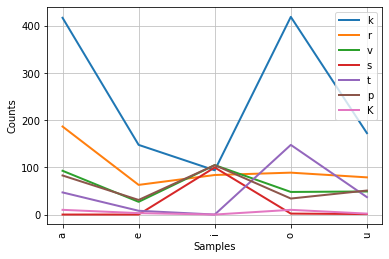

    a   e   i   o   u 
K  10   3   0  10   2 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


In [10]:
# get a list of words
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')

# extract all consonant-vowel sequences
cvs = [cv for w in rotokas_words for cv in re.findall(r'[PTKSVRptksvr][AEIOUaeiou]', w)]

# create CFD
cfd = nltk.ConditionalFreqDist(cvs)
# generate plot
cfd.plot();
# tabulate CFD
cfd.tabulate()

Examining the rows for `s` and `t`, we see they are in **partial "complementary distribution"**, which is evidence that they are not distinct phonemes in the language. 

Thus, we could conceivably **drop `s` from the Rotokas alphabet** and simply have a **pronunciation rule** that the letter `t` is pronounced `s` when followed by `i`. (Note that the single entry having su, namely kasuari, 'cassowary' is borrowed from English.)

If we want to be able to **inspect the words behind the numbers** in the above table, it would be helpful to have an **index**, allowing us to **quickly find the list of words that contains a given consonant-vowel pair**.

In [11]:
# create cv word pairs
cv_word_pairs = [(cv, w) for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]

# convert pairs into Index
cv_index = nltk.Index(cv_word_pairs)

# find words containing 'su'
print(cv_index['su'], "\n")

# find words containing 'po'
print(cv_index['po'])

['kasuari'] 

['kaapo', 'kaapopato', 'kaipori', 'kaiporipie', 'kaiporivira', 'kapo', 'kapoa', 'kapokao', 'kapokapo', 'kapokapo', 'kapokapoa', 'kapokapoa', 'kapokapora', 'kapokapora', 'kapokaporo', 'kapokaporo', 'kapokari', 'kapokarito', 'kapokoa', 'kapoo', 'kapooto', 'kapoovira', 'kapopaa', 'kaporo', 'kaporo', 'kaporopa', 'kaporoto', 'kapoto', 'karokaropo', 'karopo', 'kepo', 'kepoi', 'keposi', 'kepoto']


This program processes each word `w` in turn, and for each one, finds every substring that matches the regular expression `'[ptksvr][aeiou]'`.

In the case of the word **kasuari**, it finds **ka, su and ri**. Therefore, the `cv_word_pairs` list will contain **('ka', 'kasuari')**, **('su', 'kasuari')** and **('ri', 'kasuari')**. 

One further step, using `nltk.Index()`, **converts this into a useful index**.

<a name="Stems"></a>
###  3.5.3 Finding Word Stems
For some language processing tasks we want to **ignore word endings**, and just deal with word **stems**.

There are **various ways we can pull out the stem** of a word. 

Here's a **simple-minded approach** which just strips off anything that looks like a suffix.

In [12]:
def stem(word):
    """Strip anything that looks like a suffix."""
    
    # createa a list of suffixes
    suffixes = ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']
    # for the number of suffixes
    for i in range(len(suffixes)):
        # for every suffix in list
        for suffix in suffixes:
            # if word ends with a suffix
            if word.endswith(suffix):
                # remove suffix
                return word[:-len(suffix)]
    # if not return full word
    return word
    
# create a list of words
my_list = ['hello', 'ending', 'based', 'located', 'sentiment', 'forcefully', 'processes']

# invoke function with list of words
stemmed_list = [stem(w) for w in my_list]

# show results
print("Original word list: {}\n".format(my_list))
print("Stemmed word list: {}".format(stemmed_list))

Original word list: ['hello', 'ending', 'based', 'located', 'sentiment', 'forcefully', 'processes']

Stemmed word list: ['hello', 'end', 'bas', 'locat', 'senti', 'forceful', 'process']


We can also use **regex**.

In [13]:
# create a disjunction of all the suffixes
reg_suffixes = r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$' 

# extract words(?)
reg_stemmed_list = [re.findall(reg_suffixes, w) for w in my_list]
print(reg_stemmed_list)

[[], ['ing'], ['ed'], ['ed'], ['ment'], ['ly'], ['s']]


Here, **`re.findall()`** just **gave us the suffix even though the regular expression matched the entire word**. 

This is because the **parentheses have a second function**, to **select substrings to be extracted**. 

If we want to use the parentheses to **specify the scope of the disjunction, but not to select the material to be output**, we have to add **`?:`**.

In [14]:
# create a disjunction of all the suffixes
reg_suffixes_word = r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$'

# extract words
reg_stemmed_list_word = [re.findall(reg_suffixes_word, w) for w in my_list]
print(reg_stemmed_list_word)

[[], ['ending'], ['based'], ['located'], ['sentiment'], ['forcefully'], ['processes']]


If we would like to **split the word into stem and suffix** we should just **parenthesize both parts** of the regular expression.

In [15]:
# create a disjunction of all the suffixes
reg_suffixes_all = r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$'

# extract words
reg_stemmed_all = [re.findall(reg_suffixes_all, w) for w in my_list]
print(reg_stemmed_all)

[[], [('end', 'ing')], [('bas', 'ed')], [('locat', 'ed')], [('senti', 'ment')], [('forceful', 'ly')], [('processe', 's')]]


The regex incorrectly **found an `-s`** suffix **instead of an `-es`** suffix. 

This demonstrates another subtlety: the **star operator is "greedy"** and the .* part of the expression **tries to consume as much of the input as possible**. 

If we use the **"non-greedy"** version of the **star operator**.

In [16]:
# create a disjunction of all the suffixes
reg_suffixes_all1 = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$'

# extract words
reg_stemmed_all1 = [re.findall(reg_suffixes_all1, w) for w in my_list]
print(reg_stemmed_all1)

[[], [('end', 'ing')], [('bas', 'ed')], [('locat', 'ed')], [('senti', 'ment')], [('forceful', 'ly')], [('process', 'es')]]


In [17]:
from nltk.tokenize import word_tokenize

def stem(word):
     regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
     stem, suffix = re.findall(regexp, word)[0]
     return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
 is no basis for a system of government.  Supreme executive power derives from
 a mandate from the masses, not from some farcical aquatic ceremony."""

tokens = word_tokenize(raw)

print([stem(t) for t in tokens][:15])

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'ly', 'in', 'pond', 'distribut', 'sword', 'i', 'no', 'basi', 'for']


<a name="Tokenized"></a>
###  3.5.4 Searching Tokenized Text
**`<>`** angle brackets (token boundaries) 

For example, `"<a> <man>"` finds all instances of **'a man'** in a list of tokens. 

The angle brackets are used to mark **token boundaries**, and **any whitespace between the angle brackets is ignored** (behaviors that are **unique to NLTK's findall()** method for texts). 

In the following example, we include <.*> [1] which will match any single token, and enclose it in parentheses so only the matched word (e.g. monied) and not the matched phrase (e.g. a monied man) is produced. The second example finds three-word phrases ending with the word bro [2]. The last example finds sequences of three or more words starting with the letter l 

In [18]:
from nltk.corpus import gutenberg, nps_chat

# assign text to variable
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))

# 1. search for the letter 'a'
# 2. followed by any single token _ encolse it in ()
# 3. followed by the word 'man'
print(moby.findall(r'<a> (<.*>) <man>'), "\n")

# assign text to variable
chat = nltk.Text(nps_chat.words())

# search for any 3-word phrase:
# 1. search for any single token
# 2. followed by any single token
# 3. ending with the word 'bro'
print(chat.findall(r'<.*> <.*> <bro>'), "\n")

# 1. search for a word that starts with 'l'
# 2. is repeated 3 or more times
print(chat.findall(r'<l.*>{3,}'))

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave
None 

you rule bro; telling you bro; u twizted bro
None 

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la
None


Consolidate your understanding of regular expression patterns and substitutions using: <br>
1. **`nltk.re_show(p, s)`** which **annotates the string s to show every place where pattern p was matched** <br>
2. **`nltk.app.nemo()`** which provides a **graphical interface for exploring regular expressions**.

In [22]:
# create raw text
raw = """In 1979, Greek football turned professional. The Vardinogiannis family purchased PAO's football department 
and Giorgos Vardinogiannis became president.[14] Panathinaikos were one of the first Greek clubs that formed a women's 
team in 1980, but that department is currently inactive.

The transformation period lasted a few years, but in 1982 the club won its first professional era trophy, the Greek Cup,
and during the 1980s they would go on winning two championships (1984, 1986), four more Greek Cups (1984, 1986—with a 
4–0 against Olympiacos in the final—, 1988, 1989) and the Greek Super Cup in 1988. The great star of the team during 
these years was Dimitris Saravakos, nicknamed "The Kid." Saravakos, a high-technique explosive midfielder and iconic 
captain of Panathinaikos, was the alsolute idol for the fans during the 1980s, while other players included Nikos Sarganis,
Spiros Livathinos, Velimir Zajec, Juan Ramón Rocha, Christos Dimopoulos and Giannis Kyrastas.

In the 1984–85 season, Panathinaikos, with coach Jacek Gmoch and stars Dimitris Saravakos, Velimir Zajec, 
Juan Ramón Rocha and Ioannis Kyrastas, made a run in Europe, eliminating Feyenoord, Linfield and IFK Göteborg to reach 
the semi-finals of the European Cup, where they were knocked out by Liverpool.[11]

In 1987–88, they made it also to the quarter-finals of the UEFA Cup, eliminating Juventus, Auxerre and Budapest Honvéd. 
Dimitris Saravakos was top scorer of the competition."""

# tokenize string
tokens = word_tokenize(raw)

# annotates the string
nltk.re_show(r'Greek', raw)

In 1979, {Greek} football turned professional. The Vardinogiannis family purchased PAO's football department 
and Giorgos Vardinogiannis became president.[14] Panathinaikos were one of the first {Greek} clubs that formed a women's 
team in 1980, but that department is currently inactive.

The transformation period lasted a few years, but in 1982 the club won its first professional era trophy, the {Greek} Cup,
and during the 1980s they would go on winning two championships (1984, 1986), four more {Greek} Cups (1984, 1986—with a 
4–0 against Olympiacos in the final—, 1988, 1989) and the {Greek} Super Cup in 1988. The great star of the team during 
these years was Dimitris Saravakos, nicknamed "The Kid." Saravakos, a high-technique explosive midfielder and iconic 
captain of Panathinaikos, was the alsolute idol for the fans during the 1980s, while other players included Nikos Sarganis,
Spiros Livathinos, Velimir Zajec, Juan Ramón Rocha, Christos Dimopoulos and Giannis Kyrastas.

In the 19

In [1]:
# launch graphical interface
nltk.app.nemo()

NameError: name 'nltk' is not defined

_More information about **regexes** can be found [here](https://sceweb.sce.uhcl.edu/helm/WEBPAGE-Python/documentation/howto/regex/regex.html)._